In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1464\2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

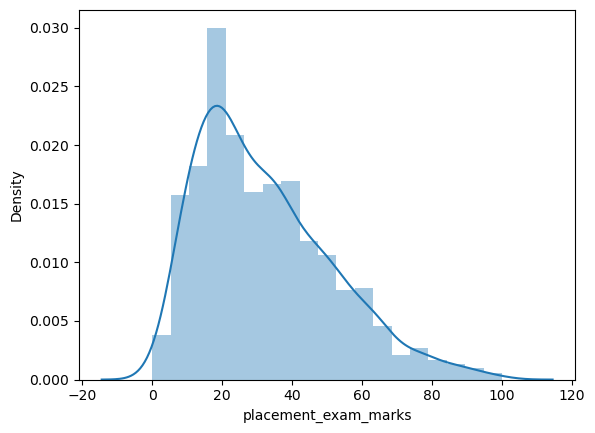

In [5]:
sns.distplot(df['placement_exam_marks'])

In [7]:
per25 = df['placement_exam_marks'].quantile(0.25)
per75 = df['placement_exam_marks'].quantile(0.75)

In [8]:
iqr = per75 - per25

In [9]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

<Axes: xlabel='placement_exam_marks'>

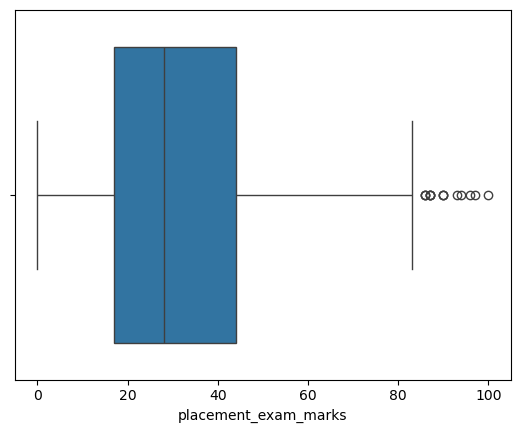

In [11]:
sns.boxplot(x=df['placement_exam_marks'])

In [ ]:
df[df['placement_exam_marks'] > upper_limit]

(15, 3)

In [14]:
# by trimming 
df_trimmed = df[(df['placement_exam_marks'] >= lower_limit) & (df['placement_exam_marks'] <= upper_limit)]

<Axes: xlabel='placement_exam_marks'>

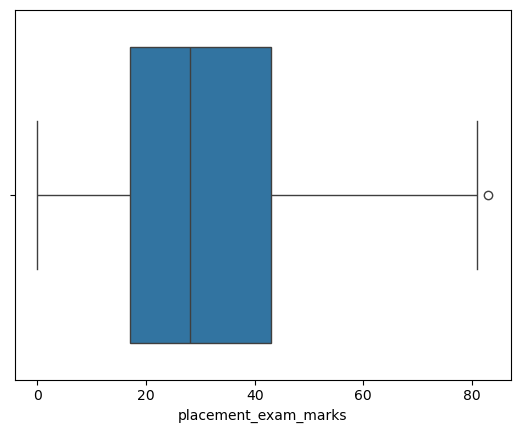

In [15]:
sns.boxplot(x=df_trimmed['placement_exam_marks'])

In [16]:
# by using capping 
df_cap = df.copy()

In [17]:
df_cap['placement_exam_marks'] = np.where(
    df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        df_cap['placement_exam_marks']
    )
)

<Axes: xlabel='placement_exam_marks'>

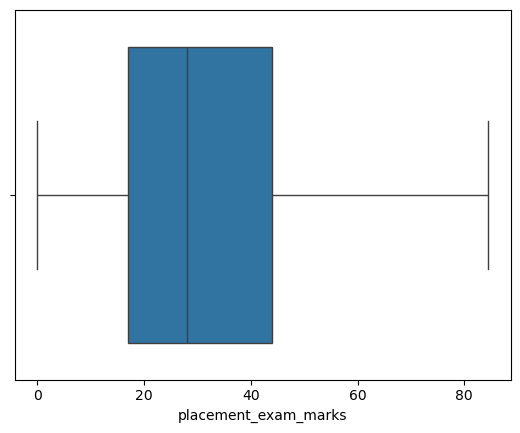

In [19]:
sns.boxplot(x=df_cap['placement_exam_marks'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1464\1407994966.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_cap['placement_exam_marks'])


<Axes: ylabel='Density'>

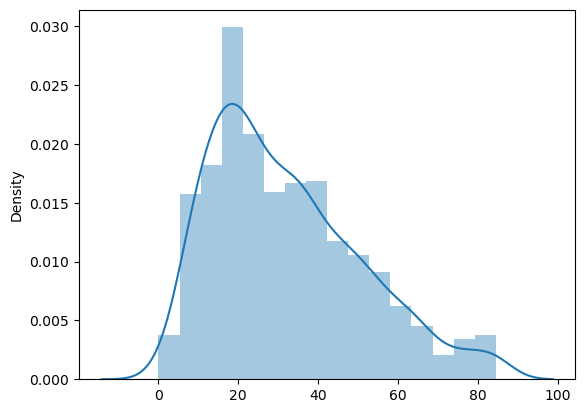

In [22]:
sns.distplot(x=df_cap['placement_exam_marks'])